In [31]:
import tensorflow as tf

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [32]:
# Read the csv data

food_prices = pd.read_csv('D:\Belajar\BANGKIT GOOGLE\Data\wfpvam_foodprices_2.csv')

C:\Users\ASUS\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [33]:
food_prices.head()

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
0,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,1,2014,50.0,NaN
1,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,2,2014,50.0,NaN
2,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,3,2014,50.0,NaN
3,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,4,2014,50.0,NaN
4,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,5,2014,50.0,NaN


In [34]:
# Data row and column

food_prices.shape

(1353688, 18)

In [35]:
# Count NA values for each column

food_prices.isna().sum()

adm0_id                     0
adm0_name                   0
adm1_id                     0
adm1_name              375273
mkt_id                      0
mkt_name                    0
cm_id                       0
cm_name                     0
cur_id                      0
cur_name                    0
pt_id                       0
pt_name                     0
um_id                       0
um_name                     0
mp_month                    0
mp_year                     0
mp_price                    0
mp_commoditysource    1353688
dtype: int64

In [36]:
# Drop mp_commoditysource 

food_prices = food_prices.drop(columns='mp_commoditysource')

In [37]:
# Filter data to Indonesia

indo_prices = food_prices[food_prices['adm0_name']=='Indonesia']
indo_prices.head()

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price
417323,116.0,Indonesia,0,NaN,974,National Average,52,Rice - Retail,0.0,IDR,15,Retail,5,KG,1,2007,5941.9752
417324,116.0,Indonesia,0,NaN,974,National Average,52,Rice - Retail,0.0,IDR,15,Retail,5,KG,2,2007,6445.0000
417325,116.0,Indonesia,0,NaN,974,National Average,52,Rice - Retail,0.0,IDR,15,Retail,5,KG,3,2007,6414.0000
417326,116.0,Indonesia,0,NaN,974,National Average,52,Rice - Retail,0.0,IDR,15,Retail,5,KG,4,2007,6083.0000
417327,116.0,Indonesia,0,NaN,974,National Average,52,Rice - Retail,0.0,IDR,15,Retail,5,KG,5,2007,5955.0000


In [38]:
# Filter Indonesia Data to Chili

df = indo_prices[(indo_prices.cm_name=='Chili (bird’s eye)   - Retail') | (indo_prices.cm_name=='Chili (red) - Retail')]
df.head()

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price
417788,116.0,Indonesia,0,NaN,974,National Average,91,Chili (red) - Retail,0.0,IDR,15,Retail,5,KG,1,2007,24974.0693
417789,116.0,Indonesia,0,NaN,974,National Average,91,Chili (red) - Retail,0.0,IDR,15,Retail,5,KG,2,2007,22593.0000
417790,116.0,Indonesia,0,NaN,974,National Average,91,Chili (red) - Retail,0.0,IDR,15,Retail,5,KG,3,2007,22807.0000
417791,116.0,Indonesia,0,NaN,974,National Average,91,Chili (red) - Retail,0.0,IDR,15,Retail,5,KG,4,2007,18414.0000
417792,116.0,Indonesia,0,NaN,974,National Average,91,Chili (red) - Retail,0.0,IDR,15,Retail,5,KG,5,2007,14910.0000


In [39]:
# Add date field into the table

df['date'] = np.where(df['mp_month']<10, df['mp_year'].map(str) + str('-0') + df['mp_month'].map(str) + str('-01'), df['mp_year'].map(str) + str('-') + df['mp_month'].map(str) + str('-01'))
df['date'] = pd.to_datetime(df['date'])
df.head()

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,date
417788,116.0,Indonesia,0,NaN,974,National Average,91,Chili (red) - Retail,0.0,IDR,15,Retail,5,KG,1,2007,24974.0693,2007-01-01
417789,116.0,Indonesia,0,NaN,974,National Average,91,Chili (red) - Retail,0.0,IDR,15,Retail,5,KG,2,2007,22593.0000,2007-02-01
417790,116.0,Indonesia,0,NaN,974,National Average,91,Chili (red) - Retail,0.0,IDR,15,Retail,5,KG,3,2007,22807.0000,2007-03-01
417791,116.0,Indonesia,0,NaN,974,National Average,91,Chili (red) - Retail,0.0,IDR,15,Retail,5,KG,4,2007,18414.0000,2007-04-01
417792,116.0,Indonesia,0,NaN,974,National Average,91,Chili (red) - Retail,0.0,IDR,15,Retail,5,KG,5,2007,14910.0000,2007-05-01


In [40]:
# Check shape

df.shape

(310, 18)

In [41]:
# Check NA

df.isna().sum()

adm0_id        0
adm0_name      0
adm1_id        0
adm1_name    310
mkt_id         0
mkt_name       0
cm_id          0
cm_name        0
cur_id         0
cur_name       0
pt_id          0
pt_name        0
um_id          0
um_name        0
mp_month       0
mp_year        0
mp_price       0
date           0
dtype: int64

In [42]:
# Save to csv data Indonesia and Chili

df.to_csv('indonesia_food_price_chili.csv', index=False)

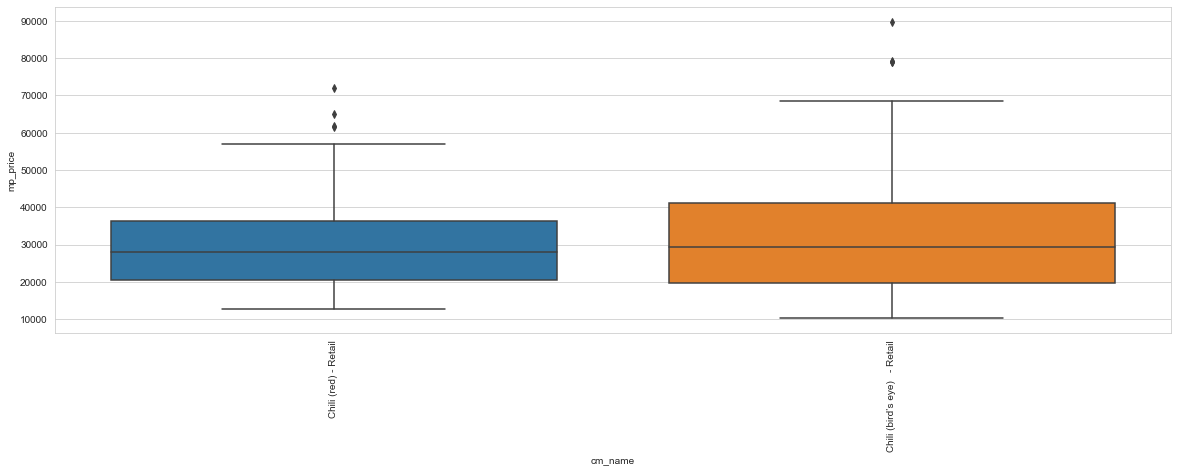

In [43]:
# Boxplot price based on chili

def plot_box(df, cols, col_y = 'mp_price'):
    for col in cols:
        fig = plt.figure(figsize=(20,6)) # define plot area
        sns.set_style("whitegrid")
        sns.boxplot(col, col_y, data=df)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.xticks(rotation=90)
        plt.show()
        
cat_cols = ['cm_name']
plot_box(df, cat_cols) 

In [44]:
# Split into Chili(Red) and Chili(Birds's Eye)

df_cr = df[(df.cm_name=='Chili (red) - Retail')]
df_cbe = df[(df.cm_name=='Chili (bird’s eye)   - Retail')]

In [45]:
# Shape of each data

print(df_cr.shape)
print(df_cbe.shape)

(155, 18)
(155, 18)


In [46]:
# Replace Chili(Red) Outliers with Median

Q1 = df_cr['mp_price'].quantile(0.25)
Q3 = df_cr['mp_price'].quantile(0.75)
IQR = Q3 - Q1

df_cr['mp_price_edit'] =  np.where(((df_cr['mp_price'] < Q1 - 1.5 * IQR)), df_cr['mp_price'].median(), df_cr['mp_price'])
df_cr['mp_price_edit'] =  np.where(((df_cr['mp_price'] > Q3 + 1.5 * IQR)), df_cr['mp_price'].median(), df_cr['mp_price'])

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [47]:
# Descriptive Statistics of Chile(Red)

df_cr[['mp_price','mp_price_edit']].describe()

,mp_price,mp_price_edit
count,155.000000,155.000000
mean,30086.188134,29127.994586
std,11627.397415,10109.306519
min,12774.000000,12774.000000
25%,20636.000000,20636.000000
50%,27911.000000,27911.000000
75%,36217.000000,35462.500000
max,71960.000000,57079.000000


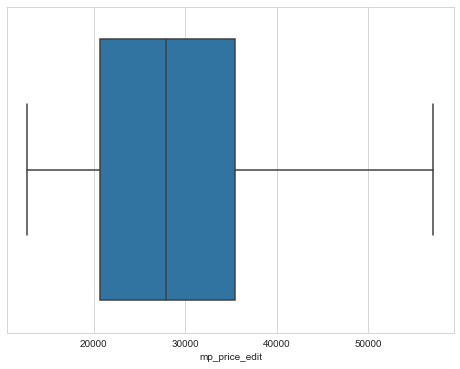

In [48]:
sns.boxplot(df_cr['mp_price_edit'])

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  """


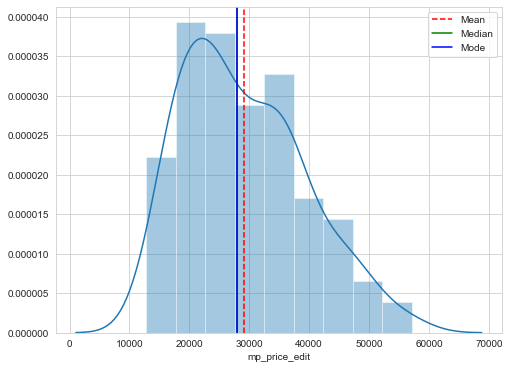

In [49]:
# Plot Distribution Variabel Price (KDE) of Chili(Red)

mean=df_cr['mp_price_edit'].mean()
median=df_cr['mp_price_edit'].median()
mode=df_cr['mp_price_edit'].mode().get_values()[0]

sns.distplot(df_cr['mp_price_edit'])
plt.axvline(mean, color='r', linestyle='--')
plt.axvline(median, color='g', linestyle='-')
plt.axvline(mode, color='b', linestyle='-')

plt.legend({'Mean':mean,'Median':median,'Mode':mode})

plt.show()

In [51]:
# Save to csv data Indonesia and Chili Red

df_cr.to_csv('indonesia_food_price_chili_red_median.csv', index=False)

In [52]:
# Replace Chili(Bird's Eye) Outliers with Median

Q1 = df_cbe['mp_price'].quantile(0.25)
Q3 = df_cbe['mp_price'].quantile(0.75)
IQR = Q3 - Q1

df_cbe['mp_price_edit'] =  np.where(((df_cbe['mp_price'] < Q1 - 1.5 * IQR)), df_cbe['mp_price'].median(), df_cbe['mp_price'])
df_cbe['mp_price_edit'] =  np.where(((df_cbe['mp_price'] > Q3 + 1.5 * IQR)), df_cbe['mp_price'].median(), df_cbe['mp_price'])

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [53]:
# Descriptive Statistics of Chile(Bird's Eye)

df_cbe[['mp_price','mp_price_edit']].describe()

,mp_price,mp_price_edit
count,155.000000,155.000000
mean,31990.225050,30637.541179
std,15283.189929,12926.891360
min,10284.000000,10284.000000
25%,19621.500000,19621.500000
50%,29312.000000,29312.000000
75%,41253.000000,40002.500000
max,89763.000000,68481.000000


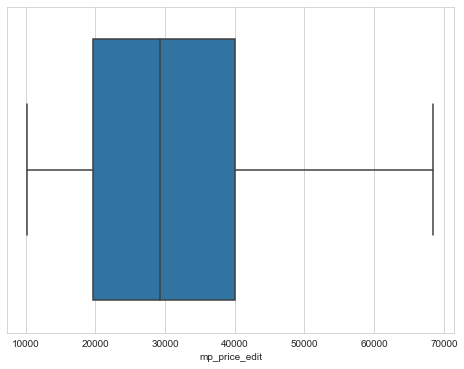

In [54]:
sns.boxplot(df_cbe['mp_price_edit'])

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  """


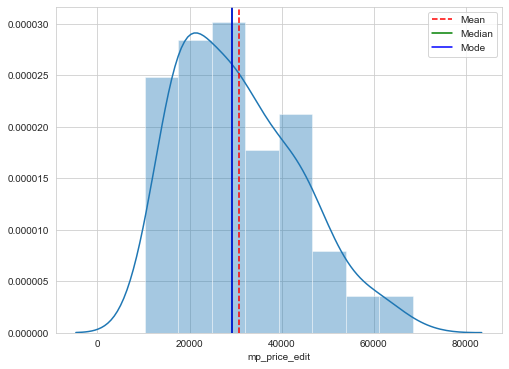

In [55]:
# Plot Distribution Variabel Price (KDE) of Chili(Bird's Eye)

mean=df_cbe['mp_price_edit'].mean()
median=df_cbe['mp_price_edit'].median()
mode=df_cbe['mp_price_edit'].mode().get_values()[0]

sns.distplot(df_cbe['mp_price_edit'])
plt.axvline(mean, color='r', linestyle='--')
plt.axvline(median, color='g', linestyle='-')
plt.axvline(mode, color='b', linestyle='-')

plt.legend({'Mean':mean,'Median':median,'Mode':mode})

plt.show()

In [57]:
# Save to csv data Indonesia and Chili Birds Eye

df_cbe.to_csv('indonesia_food_price_chili_birdeye_median.csv', index=False)

In [58]:
df_ch = pd.merge(df_cr[['date','mp_price']], df_cbe[['date','mp_price']], on=['date'])

In [59]:
df_ch.head()

,date,mp_price_x,mp_price_y
0,2007-01-01,24974.0693,16825.1196
1,2007-02-01,22593.0000,13373.0000
2,2007-03-01,22807.0000,15360.0000
3,2007-04-01,18414.0000,13347.0000
4,2007-05-01,14910.0000,10784.0000


In [60]:
df_ch.to_csv('indonesia_food_price_chili_median.csv', index=False)

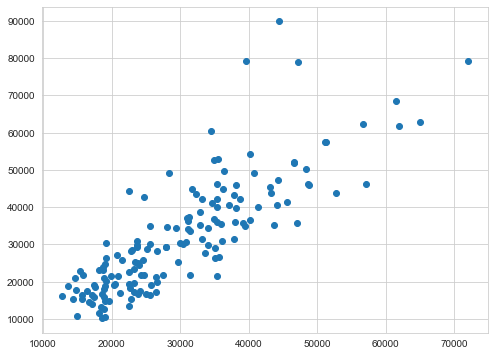

In [61]:
# Corellation

plt.scatter(df_ch['mp_price_x'], df_ch['mp_price_y'])
plt.show()

In [62]:
# calculate Pearson's correlation

from scipy.stats import pearsonr

corr, _ = pearsonr(df_ch['mp_price_x'], df_ch['mp_price_y'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.830


In [63]:
features = df_ch[['mp_price_x', 'mp_price_y']]
features.index = df_ch['date']
features.head()

,mp_price_x,mp_price_y
date,,
2007-01-01,24974.0693,16825.1196
2007-02-01,22593.0000,13373.0000
2007-03-01,22807.0000,15360.0000
2007-04-01,18414.0000,13347.0000
2007-05-01,14910.0000,10784.0000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022A383E6898>,
      dtype=object)

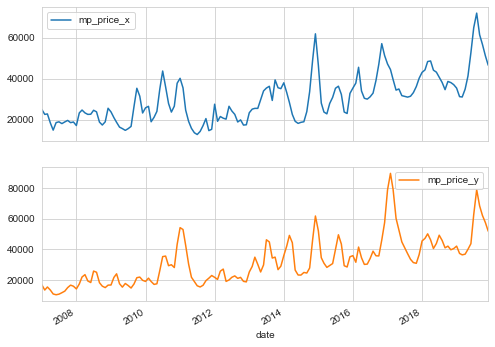

In [64]:
features.plot(subplots=True)